In [2]:
import numpy as np
import cv2
import pandas as pd
import os
import pickle
from google.colab import drive
from google.colab.patches import cv2_imshow

In [3]:
drive.mount('/content/drive')
path = '/content/drive/MyDrive/TGMT_Test'
# Hiển thị tất cả thư mục hoặc file
os.listdir(path)

Mounted at /content/drive


['face_1.jpg', 'face_2.jpg', 'face_3.jpg', 'models', 'FaceImage']

In [4]:
faceDetectionModel = path + "/models/res10_300x300_ssd_iter_140000_fp16.caffemodel"

faceDetectionProto = path + "/models/deploy.prototxt.txt.prototxt"

faceDescriptor = path + "/models/openface.nn4.small2.v1.t7"

dectectorModel = cv2.dnn.readNetFromCaffe(faceDetectionProto, faceDetectionModel)

descriptorModel = cv2.dnn.readNetFromTorch(faceDescriptor)

In [5]:
faces = path + '/FaceImage'
os.listdir(faces)

['162000309_LeHoangQuan',
 '162000339_HuynhAnhDuy',
 '162000989_NguyenThanhSang',
 '162000186_NguyenVanHuong',
 '162000651_NguyễnXuânNam',
 '151901205_BuiKhanhBinh',
 '162000947_TranThanhDat',
 '162000670_nguyenmanhthi',
 '162000223_ChuNguyenTienThanh',
 '123456789_LeNhatTung',
 '172100103_tranquangthuan',
 '172100123_NguyenTrongAn',
 '172100095_NguyenTrungNghia',
 '162001391_TranTien',
 '1711031462_VanHuuDuc',
 '172100043_NguyenHuuHa',
 '172100041_HoangHuuDien',
 '162001371_leminhtien',
 '172100062_Trần_Nguyễn_Ngọc_Quý',
 '172100048_NguyenPhamAnhKhoa',
 '172100207_DuHieuBao',
 '172100191_LeMinhKhoi',
 '172100124_BuiMinhHieu',
 '172100257_LuongThanhPhong',
 '172100177_DangNguyenThienAn',
 '172100201_NguyenThanhDat',
 '172100150_nguyensyhien',
 '172100264_NgoDangDuy',
 '172100251_NguỵenHaiDuy',
 '172100187_LeAnhQuan',
 '172100338_CaoQuocAnh(1)',
 '172100337_HaDuyPhuong',
 '172100338_CaoQuocAnh',
 '172100357_LeQuangPhu',
 '172100358_DoanVuBinhDuong',
 '172100309_TranCongSang',


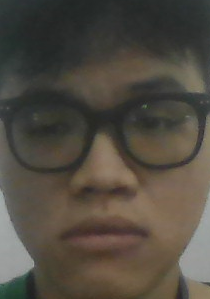

[[ 0.11023986  0.22547443 -0.09107497  0.02485253 -0.00203889  0.13476072
   0.05009724 -0.05983502 -0.03602013 -0.00270076  0.0872964   0.03392379
   0.06195755 -0.12299951 -0.0899128   0.00058976 -0.01725371  0.02858471
  -0.10950324  0.12623703  0.07977755 -0.01622395  0.00963922 -0.0401374
  -0.0214122  -0.03107568 -0.03678047 -0.07088373  0.03024375  0.15451327
  -0.10679146  0.07593392  0.00935049  0.10784715  0.02060003 -0.07649901
   0.11146667  0.15575437  0.02449267 -0.06542701 -0.06355605 -0.11486065
   0.09355848  0.04867097 -0.11433347 -0.01286999  0.16546033 -0.02800565
  -0.16665353  0.16812119  0.12233943  0.07427982 -0.13849024  0.12102711
   0.11331977 -0.05838441 -0.0442039  -0.05652424 -0.03944928 -0.13954194
  -0.05447746 -0.13502921  0.1647953  -0.17870067  0.06206606 -0.08494572
   0.01115385 -0.02113951 -0.12518683  0.07102812  0.00354207 -0.00490765
  -0.0344825   0.06086974  0.00650811 -0.04392582  0.05086695  0.03765574
  -0.01162267  0.04723787 -0.00517774  

In [6]:
quang = faces + '/1721030676_NguyenChauNhutPhi/image_60.jpg'
img1 = cv2.imread(quang)

image = img1.copy()

h, w = image.shape[:2]

imgBlob = cv2.dnn.blobFromImage(image, 1, (300,300), (104, 177, 123), swapRB=False, crop=False)

dectectorModel.setInput(imgBlob)

detections = dectectorModel.forward()


if (len(detections)>0):

  i = np.argmax(detections[0, 0, :, 2])
  confidence = detections[0, 0, i, 2]


  if (confidence>0.5):

      box = detections[0, 0, i, 3:7]* np.array([w, h, w, h])
      (startX, startY, endX, endY) =box.astype('int')

      roi = image[startY:endY, startX:endX]
      cv2_imshow(roi)

      faceBlob = cv2.dnn.blobFromImage(roi, 1/255, (96,96), (0,0,0), swapRB=True, crop=True)

      descriptorModel.setInput(faceBlob)

      vectors = descriptorModel.forward()

      print(vectors)

In [7]:

def myDetect(image_path):

  img1 = cv2.imread(image_path)

  image = img1.copy()

  h, w = image.shape[:2]

  imgBlob = cv2.dnn.blobFromImage(image, 1, (300,300), (104, 177, 123), swapRB=False, crop=False)

  dectectorModel.setInput(imgBlob)

  detections = dectectorModel.forward()

  if (len(detections)>0):
    i = np.argmax(detections[0, 0, :, 2])
    confidence = detections[0, 0, i, 2]

    if (confidence>0.5):
        box = detections[0, 0, i, 3:7]* np.array([w, h, w, h])
        (startX, startY, endX, endY) =box.astype('int')

        roi = image[startY:endY, startX:endX]

        faceBlob = cv2.dnn.blobFromImage(roi, 1/255, (96,96), (0,0,0), swapRB=True, crop=True)

        descriptorModel.setInput(faceBlob)
        vectors = descriptorModel.forward()

        return vectors

In [9]:

data = dict(data=[], label=[])

myDir = '/content/drive/MyDrive/TGMT_Test/FaceImage'
folders = os.listdir(myDir)

for folder in folders:
  path = myDir + "/"+folder
  print(path)

  files =  os.listdir(path)
  for fileName in files:
    try:
        vector = myDetect(path+'/'+fileName)
        if vector is not None:
          data['data'].append(vector)
          data['label'].append(folder)
          print('Trích xuất đặc trưng thành công')
    except:
      pass

/content/drive/MyDrive/TGMT_Test/FaceImage/162000309_LeHoangQuan
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích x

In [10]:
labelSeries = pd.Series(data['label'])
labelCounts = labelSeries.value_counts()
print(labelCounts)

1721030566_LeNguyenHoang        150
1721030676_NguyenChauNhutPhi    137
1721030848_LeQuocKy             135
1721031129_TranAnhHao           130
172100257_LuongThanhPhong       121
                               ... 
172100251_NguỵenHaiDuy          10
1721030497_HoThienSinh            9
172100103_tranquangthuan          8
1721021119_TranDuyHa              6
1721030802_NguyenNhatTien         5
Name: count, Length: 77, dtype: int64


In [11]:
print('/content/drive/MyDrive/TGMT_Test/')
fileName = '/content/drive/MyDrive/TGMT_Test/data_face_features.pickle'
pickle.dump(data, open(fileName, mode='wb'))

/content/drive/MyDrive/TGMT_Test/
